In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Input, Flatten, Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers
import numpy as np
from keras.layers.core import Lambda
from keras import backend as K
from keras import regularizers
import matplotlib.pyplot as plt
import cv2
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [2]:
from keras.datasets import cifar100

(x_train, y_train), (x_test, y_test) = cifar100.load_data()

169009152/169001437 [==============================] - 6s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test.shape)

In [4]:
train=True
num_classes = 100
weight_decay = 0.0005
x_shape = [32,32,3]

In [5]:
model = Sequential()
weight_decay = weight_decay

model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [6]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
batch_size = 128
maxepoches = 200
learning_rate = 0.1
lr_decay = 1e-6
lr_drop = 20

def lr_scheduler(epoch):
    return learning_rate * (0.5 ** (epoch // lr_drop))
reduce_lr = keras.callbacks.LearningRateScheduler(lr_scheduler)


#data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)



#optimization details
sgd = optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])


# training process in a for loop with learning rate drop every 25 epoches.

hist = model.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=maxepoches,
                    validation_data=(x_test, y_test),callbacks=[reduce_lr],verbose=2)
model.save_weights('cifar100vgg.h5')  

Epoch 1/200
 - 35s - loss: 20.0176 - acc: 0.0302 - val_loss: 16.4373 - val_acc: 0.0124
Epoch 2/200
 - 27s - loss: 11.7806 - acc: 0.0569 - val_loss: 11.0133 - val_acc: 0.0105
Epoch 3/200
 - 27s - loss: 8.1479 - acc: 0.0662 - val_loss: 7.6308 - val_acc: 0.0280
Epoch 4/200
 - 27s - loss: 6.3000 - acc: 0.0800 - val_loss: 10.0055 - val_acc: 0.0125
Epoch 5/200
 - 27s - loss: 6.0353 - acc: 0.0903 - val_loss: 6.1926 - val_acc: 0.0698
Epoch 6/200
 - 27s - loss: 6.0688 - acc: 0.0960 - val_loss: 5.9981 - val_acc: 0.0710
Epoch 7/200
 - 27s - loss: 8.9140 - acc: 0.1078 - val_loss: 7.7785 - val_acc: 0.0691
Epoch 8/200
 - 27s - loss: 6.8060 - acc: 0.1048 - val_loss: 6.5428 - val_acc: 0.0970
Epoch 9/200
 - 27s - loss: 5.9692 - acc: 0.0924 - val_loss: 5.9073 - val_acc: 0.0501
Epoch 10/200
 - 27s - loss: 5.1691 - acc: 0.1088 - val_loss: 5.6929 - val_acc: 0.0390
Epoch 11/200
 - 27s - loss: 4.4645 - acc: 0.1385 - val_loss: 4.8950 - val_acc: 0.0776
Epoch 12/200
 - 28s - loss: 4.1686 - acc: 0.1528 - val_los

Epoch 97/200
 - 27s - loss: 2.0225 - acc: 0.6896 - val_loss: 2.4795 - val_acc: 0.6137
Epoch 98/200
 - 27s - loss: 2.0298 - acc: 0.6900 - val_loss: 2.4493 - val_acc: 0.6169
Epoch 99/200
 - 27s - loss: 2.0275 - acc: 0.6892 - val_loss: 2.5095 - val_acc: 0.6062
Epoch 100/200
 - 28s - loss: 2.0142 - acc: 0.6925 - val_loss: 2.3876 - val_acc: 0.6277
Epoch 101/200
 - 27s - loss: 1.9090 - acc: 0.7204 - val_loss: 2.3007 - val_acc: 0.6457
Epoch 102/200
 - 27s - loss: 1.8278 - acc: 0.7392 - val_loss: 2.3833 - val_acc: 0.6378
Epoch 103/200
 - 27s - loss: 1.8018 - acc: 0.7412 - val_loss: 2.3582 - val_acc: 0.6323
Epoch 104/200
 - 27s - loss: 1.7720 - acc: 0.7465 - val_loss: 2.3448 - val_acc: 0.6381
Epoch 105/200
 - 27s - loss: 1.7627 - acc: 0.7489 - val_loss: 2.3192 - val_acc: 0.6454
Epoch 106/200
 - 27s - loss: 1.7505 - acc: 0.7482 - val_loss: 2.3639 - val_acc: 0.6368
Epoch 107/200
 - 27s - loss: 1.7346 - acc: 0.7501 - val_loss: 2.3930 - val_acc: 0.6334
Epoch 108/200
 - 27s - loss: 1.7162 - acc: 0.7

Epoch 192/200
 - 27s - loss: 0.9656 - acc: 0.8977 - val_loss: 2.2682 - val_acc: 0.6732
Epoch 193/200
 - 27s - loss: 0.9587 - acc: 0.8998 - val_loss: 2.2580 - val_acc: 0.6743
Epoch 194/200
 - 27s - loss: 0.9581 - acc: 0.9006 - val_loss: 2.2712 - val_acc: 0.6707
Epoch 195/200
 - 27s - loss: 0.9617 - acc: 0.8993 - val_loss: 2.2784 - val_acc: 0.6728
Epoch 196/200
 - 27s - loss: 0.9472 - acc: 0.9033 - val_loss: 2.2554 - val_acc: 0.6745
Epoch 197/200
 - 27s - loss: 0.9567 - acc: 0.9005 - val_loss: 2.2832 - val_acc: 0.6704
Epoch 198/200
 - 27s - loss: 0.9450 - acc: 0.9052 - val_loss: 2.2535 - val_acc: 0.6744
Epoch 199/200
 - 27s - loss: 0.9476 - acc: 0.9035 - val_loss: 2.2527 - val_acc: 0.6758
Epoch 200/200
 - 28s - loss: 0.9385 - acc: 0.9054 - val_loss: 2.2758 - val_acc: 0.6713


In [8]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Training Accuracy: %.2f%%" % (hist.history['acc'][maxepoches - 1]*100))
print("Testing Accuracy: %.2f%%" % (scores[1]*100))

Training Accuracy: 90.54%
Testing Accuracy: 67.13%


Saved model to disk


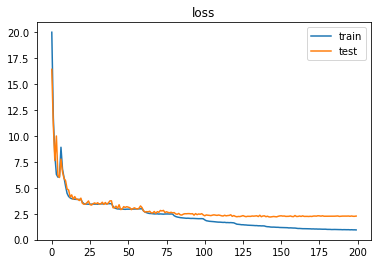

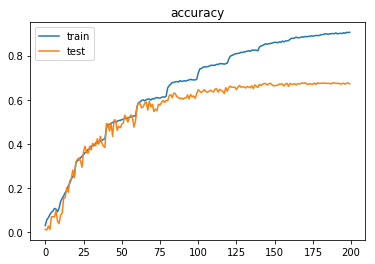

In [9]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['train','test'])
plt.title('loss')
plt.savefig("loss7.png",dpi=300,format="png")
plt.figure()
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['train','test'])
plt.title('accuracy')
plt.savefig("accuracy7.png",dpi=300,format="png")
model_json = model.to_json()
with open("model7.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model7.h5")
print("Saved model to disk")